In [1]:
from astronify.series import SoniSeries
from astropy.table import Table


WxPython is not found for the current python version.
Pyo will use a minimal GUI toolkit written with Tkinter (if available).
This toolkit has limited functionnalities and is no more
maintained or updated. If you want to use all of pyo's
GUI features, you should install WxPython, available here:
http://www.wxpython.org/



# Data Series Sonification

Data series sonification refers to taking a data table and mapping one column to time & one column to pitch. So we only ever need two columns.

In [2]:
data_table = Table({"time":[0, 1, 2, 3, 4, 5, 9, 10, 11, 12],
                    "flux": [0.3, 0.4, 0.3, 0.5, 0.5, 0.4, 0.3, 0.2, 0.3, 0.1]})

data_table

time,flux
int64,float64
0,0.3
1,0.4
2,0.3
3,0.5
4,0.5
5,0.4
9,0.3
10,0.2
11,0.3


Default note-spacing is 0.01, so we need to increase the spacing when working with few datapoints

In [ ]:
data_soni = SoniSeries(data_table)
data_soni.note_spacing = 0.2 
data_soni.sonify()
data_soni.play()

# Troubleshooting

In [ ]:
s = pyo.Server(duplex=0).boot()
s.start()
a = pyo.Sine(mul=0.01).out()

In [ ]:
s.shutdown()
data_soni.play()

# play method
# https://github.com/spacetelescope/astronify/blob/9a8bc0f20eeb409dfeda3c37df43e78a8fd18e1f/astronify/series/series.py#L252

In [ ]:
ls astronify-jwst-sample-data

# Working with JWST data

In [3]:
from astropy.io import fits
import numpy as np

In [4]:
#data = fits.getdata('astronify-jwst-sample-data/jw02738-o002_s01092_niriss_f200w-gr150c-gr150r_x1d.fits')
data = fits.getdata('astronify-jwst-sample-data/jw02738-o002_s00628_niriss_f200w-gr150c-gr150r_x1d.fits')

In [5]:
import matplotlib.pyplot as plt
x, y = data['WAVELENGTH'], data['FLUX']

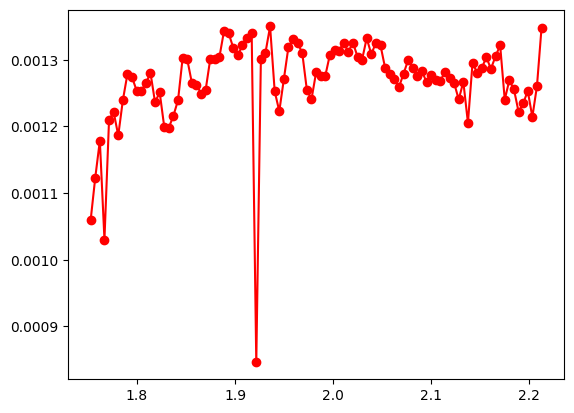

In [6]:
import numpy as np
plt.plot(x, y, marker='o', color='r')

In [7]:
x_masked = x[~np.isnan(y)]
y_masked = y[~np.isnan(y)]

In [8]:
data_table = Table({"time":x_masked,
                    "flux":y_masked})

data_table

time,flux
float64,float64
2.212444305419922,0.001348084287603298
2.207754135131836,0.0012602765045476823
2.20306396484375,0.0012140848878550187
2.198373794555664,0.0012531066752396315
2.193683624267578,0.0012343256458955713
2.1889939308166504,0.0012219934842458658
2.1843035221099854,0.0012555803592457398
2.179614543914795,0.0012694138813224712
2.174924612045288,0.001240005337073427


In [9]:
idx = np.argsort(x_masked)

In [10]:
data_table[idx]

time,flux
float64,float64
1.752825379371643,0.00105931891530135
1.7575150728225708,0.0011229572178550907
1.7622053623199463,0.001178549885850443
1.7668952941894531,0.0010302586503750926
1.7715853452682495,0.0012098212876180913
1.7762755155563354,0.001221475183544154
1.7809654474258423,0.0011863173654433725
1.7856554985046387,0.0012391494451725821
1.7903448343276978,0.001278633246807219


<IPython.core.display.Javascript object>


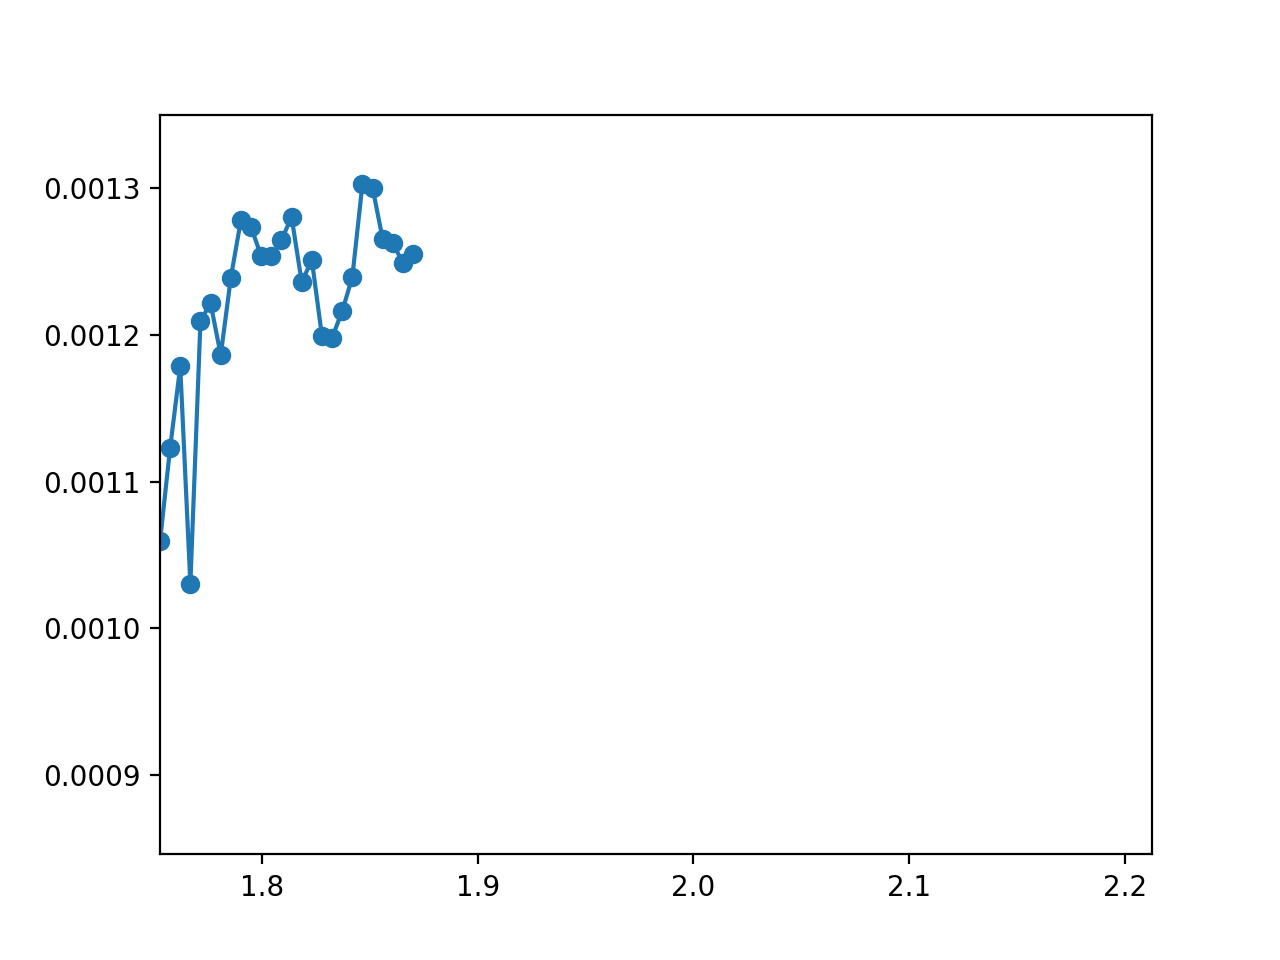

Pyo warning: Portaudio output device `T16` has fewer channels (1) than requested (2).
Pyo warning: Portaudio input device `T16` has fewer channels (1) than requested (2).
Pyo warning: Portmidi warning: no midi device found!
Portmidi closed.


In [27]:
%matplotlib notebook
from matplotlib.animation import FuncAnimation

fig = plt.figure()

note_spacing = 0.7 # in seconds

graph, = plt.plot([], [], marker='o')
plt.xlim(min(x_masked), max(x_masked))
plt.ylim(min(y_masked), max(y_masked))
def animate(i):
    graph.set_data(x_masked[idx][:i+1], y_masked[idx][:i+1])
    return graph

ani = FuncAnimation(fig=fig, func=animate, frames=len(x)-1, interval=note_spacing*990)

#from IPython.display import HTML
#HTML(ani.to_jshtml())

data_soni = SoniSeries(data_table[idx])
data_soni.note_spacing = note_spacing
data_soni.sonify()
data_soni.play()

In [25]:
data_soni.stop()

In [ ]:
data_soni.stop()

In [ ]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

x = np.arange(10)
y = np.random.random(10)

fig = plt.figure()
plt.xlim(0, 10)
plt.ylim(0, 1)
graph, = plt.plot([], [], 'o', markersize=5)

def animate(i):
    graph.set_data(x[:i+1], y[:i+1])
    return graph

ani = FuncAnimation(fig, animate, frames=10, interval=200)
plt.show()